In [ ]:
# Vergleich OSM type "residential" mit Fahrradstraßen in Berlin
# Zur Erstellung des Codes wurde die generative Künstliche Intelligenz (KI) „Claude AI“ des Anbieters Anthropic in Version 3.7 genutzt

In [1]:
# Einfache Abfrage OSM "type" Klassifikation von Fahrradstraßen-Segmenten

import pandas as pd
import pyarrow.parquet as pq

# Load your data
PARQUET_FILE = "data/network_all_months_plus_25833_length_with_fahrradstrasse.parquet"
COLUMN_TYPE = 'type'  # Column for street type
COLUMN_LENGTH = 'length_m'  # Column for segment length
COLUMN_FAHRRADSTRASSE = 'Fahrradstrasse'  # Column for fahrradstrasse field

def get_fahrradstrasse_street_types():
    # Initialize counters and length sums for each street type
    street_type_data = {}
    
    # Open parquet file
    parquet_file = pq.ParquetFile(PARQUET_FILE)
    num_row_groups = parquet_file.metadata.num_row_groups
    
    # Process each row group
    print("Processing parquet file to identify street types with fahrradstrasse=1...")
    for rg in range(num_row_groups):
        # Read the necessary columns
        df_chunk = parquet_file.read_row_group(rg, columns=[COLUMN_TYPE, COLUMN_LENGTH, COLUMN_FAHRRADSTRASSE]).to_pandas()
        
        # Filter rows where fahrradstrasse = 1
        df_chunk = df_chunk[df_chunk[COLUMN_FAHRRADSTRASSE] == 1]
        
        # Drop rows with missing length
        df_chunk = df_chunk.dropna(subset=[COLUMN_LENGTH])
        
        # Group by street type and aggregate
        for street_type, group in df_chunk.groupby(COLUMN_TYPE):
            if street_type not in street_type_data:
                street_type_data[street_type] = {'count': 0, 'length_m': 0}
            
            street_type_data[street_type]['count'] += len(group)
            street_type_data[street_type]['length_m'] += group[COLUMN_LENGTH].sum()
    
    # Create a DataFrame with the results
    result_data = []
    for street_type, data in street_type_data.items():
        # Convert length to km
        length_km = data['length_m'] / 1000
        
        result_data.append({
            'street_type': street_type,
            'count': data['count'],
            'length_km': length_km
        })
    
    # Convert to DataFrame and sort by count (descending)
    result_df = pd.DataFrame(result_data)
    result_df = result_df.sort_values('count', ascending=False)
    
    # Calculate totals
    total_count = result_df['count'].sum()
    total_length = result_df['length_km'].sum()
    
    # Print the human-readable table
    print(f"\nOSM street types with fahrradstrasse=1:")
    print(f"{'Street Type':<25} {'Count':<12} {'Length (km)':<15} {'% of Count':<15} {'% of Length':<15}")
    print("-" * 85)
    
    for _, row in result_df.iterrows():
        percent_count = (row['count'] / total_count) * 100
        percent_length = (row['length_km'] / total_length) * 100
        print(f"{row['street_type']:<25} {row['count']:<12,d} {row['length_km']:<15,.2f} {percent_count:<15,.2f} {percent_length:<15,.2f}")
    
    print("-" * 85)
    print(f"{'Total':<25} {total_count:<12,d} {total_length:<15,.2f} {100:<15,.2f} {100:<15,.2f}")
    print(f"\nTotal unique street types with fahrradstrasse=1: {len(result_df)}")
    
    # Create Excel-friendly output
    excel_output = "street_type\tcount\tlength_km\tpercent_count\tpercent_length\n"
    for _, row in result_df.iterrows():
        percent_count = (row['count'] / total_count) * 100
        percent_length = (row['length_km'] / total_length) * 100
        excel_output += f"{row['street_type']}\t{row['count']}\t{row['length_km']:.2f}\t{percent_count:.2f}\t{percent_length:.2f}\n"
    
    print("\n\nExcel-friendly table (tab-delimited, copy the following):")
    print("------------------------------------------------------------")
    print(excel_output)
    
    return result_df

# Execute the function
fahrradstrasse_types_df = get_fahrradstrasse_street_types()

Processing parquet file to identify street types with fahrradstrasse=1...

OSM street types with fahrradstrasse=1:
Street Type               Count        Length (km)     % of Count      % of Length    
-------------------------------------------------------------------------------------
residential               1,526        37.90           95.26           90.59          
service                   33           2.64            2.06            6.31           
cycleway                  14           0.32            0.87            0.76           
pedestrian                13           0.53            0.81            1.27           
tertiary                  11           0.28            0.69            0.67           
unclassified              5            0.17            0.31            0.39           
-------------------------------------------------------------------------------------
Total                     1,602        41.84           100.00          100.00         

Total unique str

Analyzing parquet file: data/network_all_months_plus_25833_length_with_fahrradstrasse.parquet
Parquet file has 12 row groups and approximately 466,957 rows
Processing row groups to extract residential street speed data


Processing row groups:   0%|          | 0/12 [00:00<?, ?it/s]

Chunks in row group 0:   0%|          | 0/1 [00:00<?, ?it/s]

Chunks in row group 1:   0%|          | 0/1 [00:00<?, ?it/s]

Chunks in row group 2:   0%|          | 0/1 [00:00<?, ?it/s]

Chunks in row group 3:   0%|          | 0/1 [00:00<?, ?it/s]

Chunks in row group 4:   0%|          | 0/1 [00:00<?, ?it/s]

Chunks in row group 5:   0%|          | 0/1 [00:00<?, ?it/s]

Chunks in row group 6:   0%|          | 0/1 [00:00<?, ?it/s]

Chunks in row group 7:   0%|          | 0/1 [00:00<?, ?it/s]

Error processing row group 8: Corrupt snappy compressed data.


Chunks in row group 9:   0%|          | 0/1 [00:00<?, ?it/s]

Chunks in row group 10:   0%|          | 0/1 [00:00<?, ?it/s]

Chunks in row group 11:   0%|          | 0/1 [00:00<?, ?it/s]

Processed 1,372 Fahrradstrasse and 79,814 non-Fahrradstrasse residential segments
Original sample size - Fahrradstrasse: 1372, Non-Fahrradstrasse: 79814
Effective sample size - Fahrradstrasse: 575.1, Non-Fahrradstrasse: 37848.9
Performing Mann-Whitney U test (interpret with effective sample size)
Mann-Whitney U statistic: 79862020.0000
p-value: 0.000000 (based on 1372 and 79814 segments)
Note: The effective sample sizes are 575.1 and 37848.9
Cohen's d (weighted): 0.769 (large effect)
Length-weighted mean speed - Fahrradstrasse: 19.71 km/h, Non-Fahrradstrasse: 17.08 km/h
Creating length-weighted histogram comparison
Saved length-weighted histogram comparison


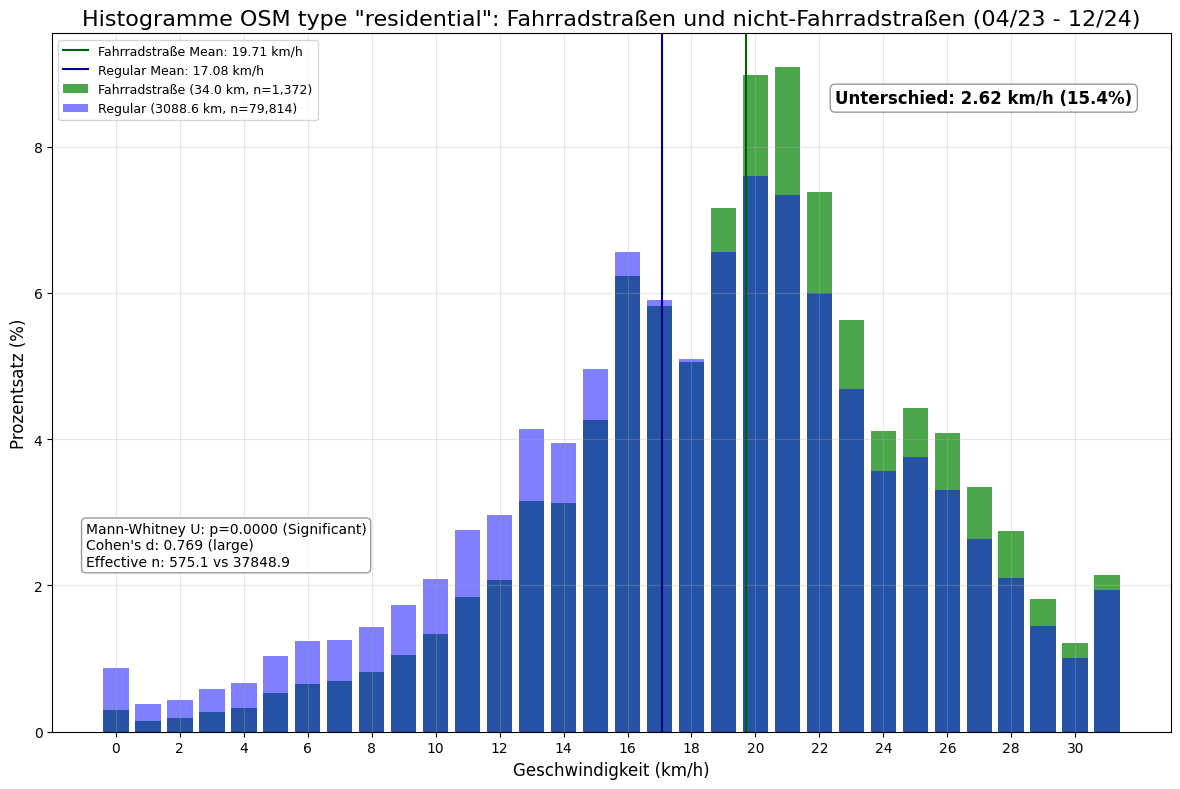

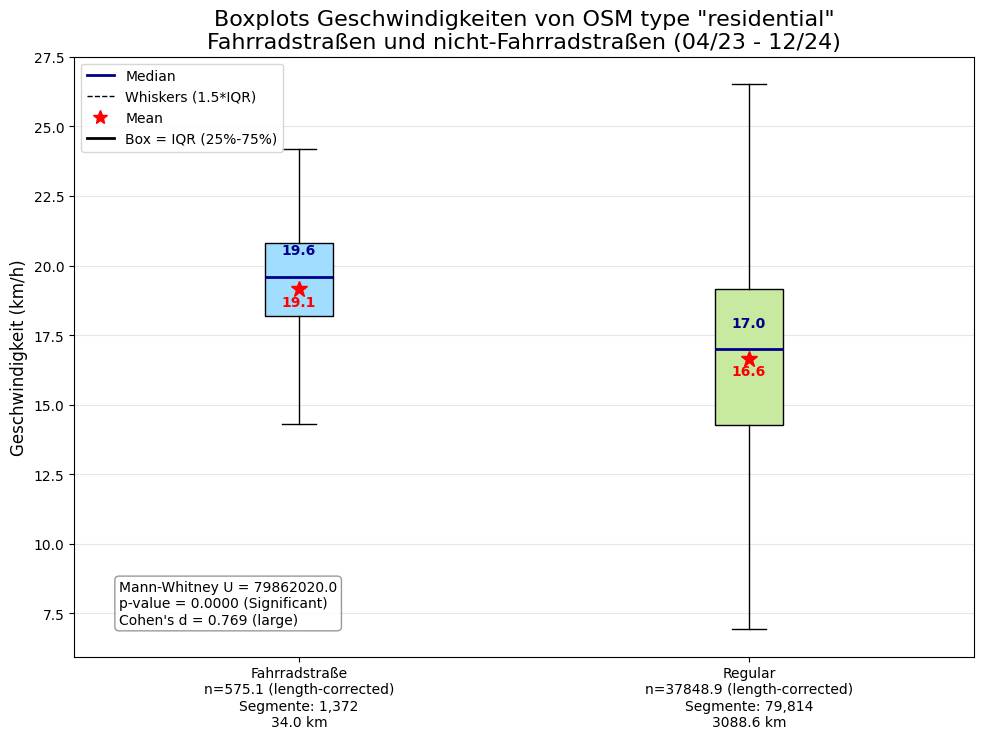

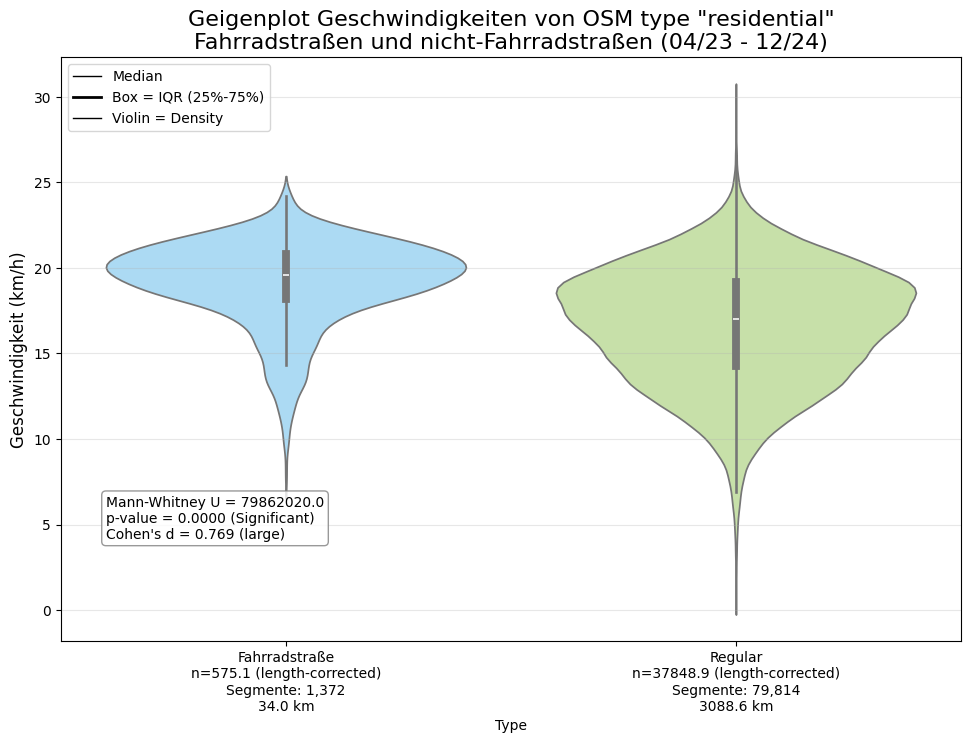

Length-weighted analysis complete. Check the output directory for results.
Length-weighted analysis complete. Check the output directory for results.


In [2]:
# Vergleich Fahrradstraßen mit anderen OSM "type" residential Segmenten: Mann-Whitney U Test, Cohen's d Effektstärke-Test (Geschwindigkeiten gewichtet nach Länge)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pyarrow.parquet as pq
import gc
from tqdm.notebook import tqdm
import os
import matplotlib.patches as mpatches

# Configuration - modify to match your setup
PARQUET_FILE = "data/network_all_months_plus_25833_length_with_fahrradstrasse.parquet"
OUTPUT_DIR = "analysis_results/007_Fahrradstrassen_vs_OSM_residential_CLIP"
COLUMN_TYPE = 'type'  # Column for street type
COLUMN_HIST = '2304-2412_speeds'  # Column for speed histogram data
COLUMN_LENGTH = 'length_m'  # Column for length in meters
COLUMN_FAHRRADSTRASSE = 'Fahrradstrasse'  # Column for Fahrradstrasse designation

# Plot configurations
PLOT_CONFIG = {
    # General
    'TEXT_FONT_SIZE': 10,
    'TITLE_FONT_SIZE': 16,
    'AXIS_LABEL_FONT_SIZE': 12,
    'LEGEND_FONT_SIZE': 9,
    'DPI': 300,
    
    # Colors
    'FS_COLOR': 'green',
    'NON_FS_COLOR': 'blue',
    'FS_MEAN_COLOR': 'darkgreen',
    'NON_FS_MEAN_COLOR': 'darkblue',
    'FS_BOX_COLOR': '#a0ddff',
    'NON_FS_BOX_COLOR': '#c8e9a0',
    'MEDIAN_COLOR': 'darkblue',
    'MEAN_COLOR': 'red',
    
    # Labels
    'FS_LABEL': 'Fahrradstraße',
    'NON_FS_LABEL': 'Regular',
    'HISTOGRAM_TITLE': 'Histogramme OSM type "residential": Fahrradstraßen und nicht-Fahrradstraßen (04/23 - 12/24)',
    'BOXPLOT_TITLE': 'Boxplots Geschwindigkeiten von OSM type "residential"\nFahrradstraßen und nicht-Fahrradstraßen (04/23 - 12/24)',
    'VIOLINPLOT_TITLE': 'Geigenplot Geschwindigkeiten von OSM type "residential"\nFahrradstraßen und nicht-Fahrradstraßen (04/23 - 12/24)',
    'X_LABEL': 'Geschwindigkeit (km/h)',
    'Y_LABEL': 'Prozentsatz (%)',
    
    # Box annotations
    'ANNOTATION_BBOX_STYLE': dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
}

# Make sure output directory exists
os.makedirs(OUTPUT_DIR, exist_ok=True)

def log(message):
    """Print a log message"""
    print(message)

def force_gc():
    """Force garbage collection"""
    gc.collect()

def parse_histogram(hist_str):
    """Parse histogram string to numpy array"""
    try:
        if isinstance(hist_str, str):
            hist_str = hist_str.strip('[]')
            # Fast NumPy parsing
            try:
                values = np.fromstring(hist_str, sep=',')
                return values
            except:
                # Fallback to manual parsing if NumPy method fails
                values = [float(x) for x in hist_str.split(',')]
                return np.array(values)
        else:
            return np.zeros(32)  # Return zeros for missing histograms
    except Exception as e:
        log(f"Error parsing histogram: {e}")
        return np.zeros(32)

def calculate_weighted_mean(histogram):
    """Calculate mean from a histogram (if the histogram is already weighted by length, this gives a length-weighted mean)"""
    speed_bins = np.arange(32)  # 0-31 km/h
    total_count = np.sum(histogram)
    
    if total_count > 0:
        mean_speed = np.sum(speed_bins * histogram) / total_count
        return mean_speed
    return np.nan

def calculate_cohens_d(group1, group2, weights1, weights2):
    """Calculate Cohen's d effect size between two groups with weights"""
    # Get weighted means
    mean1 = np.average(group1, weights=weights1)
    mean2 = np.average(group2, weights=weights2)
    
    # Sample sizes (sum of weights)
    n1, n2 = np.sum(weights1), np.sum(weights2)
    
    # Weighted variances
    var1 = np.average((group1 - mean1)**2, weights=weights1)
    var2 = np.average((group2 - mean2)**2, weights=weights2)
    
    # Pooled standard deviation (weighted)
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    
    # Cohen's d
    d = abs(mean1 - mean2) / pooled_std
    return d, mean1, mean2

def create_length_weighted_histogram(fs_hist, non_fs_hist, stats_info, output_dir=OUTPUT_DIR):
    """Create a length-weighted histogram comparison with Mann-Whitney results"""
    log("Creating length-weighted histogram comparison")
    
    # Create speed bins
    speed_bins = np.arange(32)
    
    # Create figure
    plt.figure(figsize=(12, 8))
    
    # Normalize histograms
    fs_hist_norm = fs_hist / np.sum(fs_hist) if np.sum(fs_hist) > 0 else np.zeros_like(fs_hist)
    non_fs_hist_norm = non_fs_hist / np.sum(non_fs_hist) if np.sum(non_fs_hist) > 0 else np.zeros_like(non_fs_hist)
    
    # Plot histograms (using overlapping style instead of side-by-side)
    plt.bar(speed_bins, fs_hist_norm * 100, alpha=0.7, 
            label=f'{PLOT_CONFIG["FS_LABEL"]} ({stats_info["fs_length_km"]:.1f} km, n={stats_info["fs_count"]:,})', 
            color=PLOT_CONFIG['FS_COLOR'], width=0.8)
    plt.bar(speed_bins, non_fs_hist_norm * 100, alpha=0.5, 
            label=f'{PLOT_CONFIG["NON_FS_LABEL"]} ({stats_info["non_fs_length_km"]:.1f} km, n={stats_info["non_fs_count"]:,})', 
            color=PLOT_CONFIG['NON_FS_COLOR'], width=0.8)
    
    # Add vertical lines for means
    plt.axvline(x=stats_info["fs_mean"], color=PLOT_CONFIG['FS_MEAN_COLOR'], linestyle='-', 
                label=f'{PLOT_CONFIG["FS_LABEL"]} Mean: {stats_info["fs_mean"]:.2f} km/h')
    plt.axvline(x=stats_info["non_fs_mean"], color=PLOT_CONFIG['NON_FS_MEAN_COLOR'], linestyle='-', 
                label=f'{PLOT_CONFIG["NON_FS_LABEL"]} Mean: {stats_info["non_fs_mean"]:.2f} km/h')
    
    # Calculate and show difference
    diff = stats_info["fs_mean"] - stats_info["non_fs_mean"]
    pct_diff = 100 * diff / stats_info["non_fs_mean"]
    diff_text = f"Unterschied: {diff:.2f} km/h ({pct_diff:.1f}%)"
    
    # Add legends first
    plt.legend(loc='upper left', fontsize=PLOT_CONFIG['LEGEND_FONT_SIZE'])
    
    # Add test results below the legend but OUTSIDE the diagram
    plt.annotate(f"Mann-Whitney U: p={stats_info['p_value']:.4f} ({stats_info['significance']})\n"
                f"Cohen's d: {stats_info['cohens_d']:.3f} ({stats_info['effect_size']})\n"
                f"Effective n: {stats_info['effective_n_fs']:.1f} vs {stats_info['effective_n_non_fs']:.1f}", 
                xy=(0.03, 0.3), xycoords='axes fraction',
                fontsize=PLOT_CONFIG['TEXT_FONT_SIZE'],
                bbox=PLOT_CONFIG['ANNOTATION_BBOX_STYLE'],
                verticalalignment='top')
    
    # Add difference annotation to the right
    plt.annotate(diff_text, xy=(0.7, 0.9), xycoords='axes fraction',
                fontsize=12, fontweight='bold',
                bbox=PLOT_CONFIG['ANNOTATION_BBOX_STYLE'])
    
    # Add labels and title
    plt.xlabel(PLOT_CONFIG['X_LABEL'], fontsize=PLOT_CONFIG['AXIS_LABEL_FONT_SIZE'])
    plt.ylabel(PLOT_CONFIG['Y_LABEL'], fontsize=PLOT_CONFIG['AXIS_LABEL_FONT_SIZE'])
    plt.title(PLOT_CONFIG['HISTOGRAM_TITLE'], fontsize=PLOT_CONFIG['TITLE_FONT_SIZE'])
    plt.grid(alpha=0.3)
    plt.xticks(range(0, 32, 2))
    
    # Adjust layout to provide more space on the bottom for annotations
    plt.subplots_adjust(left=0.1, bottom=0.18)
    plt.tight_layout()
    
    # Save figure
    plt.savefig(os.path.join(output_dir, "length_weighted_speed_histogram.png"), dpi=PLOT_CONFIG['DPI'], bbox_inches='tight')
    log("Saved length-weighted histogram comparison")
    plt.show()
    plt.close()

def compare_residential_types():
    """Compare speeds between residential streets with and without Fahrradstrasse designation"""
    log(f"Analyzing parquet file: {PARQUET_FILE}")
    
    # Verify the parquet file exists
    if not os.path.exists(PARQUET_FILE):
        log(f"Error: File {PARQUET_FILE} not found")
        return None
    
    # Get file info
    parquet_file = pq.ParquetFile(PARQUET_FILE)
    num_row_groups = parquet_file.metadata.num_row_groups
    total_rows = parquet_file.metadata.num_rows
    log(f"Parquet file has {num_row_groups} row groups and approximately {total_rows:,} rows")
    
    # Define the specific columns we need
    columns = [COLUMN_TYPE, COLUMN_HIST, COLUMN_LENGTH, COLUMN_FAHRRADSTRASSE]
    
    # Initialize storage for results
    residential_data = {
        'Fahrradstrasse': {
            'speeds': [], 
            'lengths': [], 
            'count': 0,
            'histograms': [],
            'weighted_speeds': [], 
            'segment_weights': []
        },
        'Non-Fahrradstrasse': {
            'speeds': [], 
            'lengths': [], 
            'count': 0,
            'histograms': [],
            'weighted_speeds': [], 
            'segment_weights': []
        }
    }
    
    # Process each row group with efficient chunking
    log("Processing row groups to extract residential street speed data")
    
    # Define chunk size for efficient processing within each row group
    CHUNK_SIZE = 50000
    
    for rg in tqdm(range(num_row_groups), desc="Processing row groups"):
        try:
            # Get the row group size to determine number of chunks needed
            row_group_metadata = parquet_file.metadata.row_group(rg)
            row_group_size = row_group_metadata.num_rows
            num_chunks = (row_group_size + CHUNK_SIZE - 1) // CHUNK_SIZE  # Ceiling division
            
            # Read the entire row group
            table = parquet_file.read_row_group(rg, columns=columns)
            
            # Process each chunk of the row group
            for chunk_idx in tqdm(range(num_chunks), desc=f"Chunks in row group {rg}", leave=False):
                # Calculate offsets
                offset = chunk_idx * CHUNK_SIZE
                length = min(CHUNK_SIZE, row_group_size - offset)
                
                # Extract just this chunk from the row group
                chunk_table = table.slice(offset, length)
                df_chunk = chunk_table.to_pandas()
                
                # Filter out NaN values and only residential streets
                df_chunk = df_chunk.dropna(subset=[COLUMN_TYPE, COLUMN_HIST, COLUMN_LENGTH])
                df_residential = df_chunk[df_chunk[COLUMN_TYPE] == 'residential']
                
                # Process each row in this chunk
                for _, row in df_residential.iterrows():
                    hist = parse_histogram(row[COLUMN_HIST])
                    if len(hist) > 0 and np.sum(hist) > 0:
                        segment_length = row[COLUMN_LENGTH]
                        
                        # Calculate the weighted mean speed for this segment
                        mean = calculate_weighted_mean(hist)
                        
                        if not np.isnan(mean):
                            # Store both the segment histogram and its length for later aggregation
                            # Check Fahrradstrasse designation
                            if row[COLUMN_FAHRRADSTRASSE] == 1:
                                residential_data['Fahrradstrasse']['speeds'].append(mean)
                                residential_data['Fahrradstrasse']['lengths'].append(segment_length)
                                residential_data['Fahrradstrasse']['count'] += 1
                                residential_data['Fahrradstrasse']['histograms'].append(hist)
                                residential_data['Fahrradstrasse']['weighted_speeds'].append(mean)
                                residential_data['Fahrradstrasse']['segment_weights'].append(segment_length)
                            else:
                                residential_data['Non-Fahrradstrasse']['speeds'].append(mean)
                                residential_data['Non-Fahrradstrasse']['lengths'].append(segment_length)
                                residential_data['Non-Fahrradstrasse']['count'] += 1
                                residential_data['Non-Fahrradstrasse']['histograms'].append(hist)
                                residential_data['Non-Fahrradstrasse']['weighted_speeds'].append(mean)
                                residential_data['Non-Fahrradstrasse']['segment_weights'].append(segment_length)
                
                # Clean up to free memory after each chunk
                del df_chunk, chunk_table, df_residential
                force_gc()
            
            # Clean up the entire row group data
            del table
            force_gc()
                
        except Exception as e:
            log(f"Error processing row group {rg}: {e}")
    
    # Count total processed segments
    total_fahrrad = residential_data['Fahrradstrasse']['count']
    total_non_fahrrad = residential_data['Non-Fahrradstrasse']['count']
    log(f"Processed {total_fahrrad:,} Fahrradstrasse and {total_non_fahrrad:,} non-Fahrradstrasse residential segments")
    
    # Check if we have sufficient data
    if total_fahrrad < 30 or total_non_fahrrad < 30:
        log("Warning: Insufficient data for one or both groups (minimum 30 segments required)")
        if total_fahrrad < 30:
            log(f"Only {total_fahrrad} Fahrradstrasse segments found")
        if total_non_fahrrad < 30:
            log(f"Only {total_non_fahrrad} non-Fahrradstrasse segments found")
        return None
    
    # Calculate length-weighted histograms - no additional weighting needed since histograms are already weighted
    fs_agg_hist = np.zeros(32)
    non_fs_agg_hist = np.zeros(32)
    
    # Sum the already length-weighted histograms
    for hist in residential_data['Fahrradstrasse']['histograms']:
        fs_agg_hist += hist
    
    for hist in residential_data['Non-Fahrradstrasse']['histograms']:
        non_fs_agg_hist += hist
    
    # Normalize to ensure they sum to 1
    fs_agg_hist = fs_agg_hist / np.sum(fs_agg_hist) if np.sum(fs_agg_hist) > 0 else fs_agg_hist
    non_fs_agg_hist = non_fs_agg_hist / np.sum(non_fs_agg_hist) if np.sum(non_fs_agg_hist) > 0 else non_fs_agg_hist
    
    # Calculate length-weighted means and medians
    fahrrad_weighted_mean = np.average(
        residential_data['Fahrradstrasse']['weighted_speeds'],
        weights=residential_data['Fahrradstrasse']['segment_weights']
    )
    
    non_fahrrad_weighted_mean = np.average(
        residential_data['Non-Fahrradstrasse']['weighted_speeds'],
        weights=residential_data['Non-Fahrradstrasse']['segment_weights']
    )
    
    # Instead of expanding the data (which may lead to computational issues),
    # we'll use the original data with the effective sample size approach
    
    # Calculate effective sample size using relative weight approach
    fahrrad_weights = np.array(residential_data['Fahrradstrasse']['segment_weights'])
    non_fahrrad_weights = np.array(residential_data['Non-Fahrradstrasse']['segment_weights'])
    
    # Effective n for Fahrradstrasse segments
    effective_n_fahrrad = np.sum(fahrrad_weights)**2 / np.sum(fahrrad_weights**2)
    
    # Effective n for non-Fahrradstrasse segments
    effective_n_non_fahrrad = np.sum(non_fahrrad_weights)**2 / np.sum(non_fahrrad_weights**2)
    
    log(f"Original sample size - Fahrradstrasse: {len(fahrrad_weights)}, Non-Fahrradstrasse: {len(non_fahrrad_weights)}")
    log(f"Effective sample size - Fahrradstrasse: {effective_n_fahrrad:.1f}, Non-Fahrradstrasse: {effective_n_non_fahrrad:.1f}")
    
    # Perform Mann-Whitney U test using the weighted speeds
    # We'll use the original speeds but interpret the results with the effective sample size in mind
    log("Performing Mann-Whitney U test (interpret with effective sample size)")
    u_stat, p_value = stats.mannwhitneyu(
        residential_data['Fahrradstrasse']['weighted_speeds'],
        residential_data['Non-Fahrradstrasse']['weighted_speeds']
    )
    log(f"Mann-Whitney U statistic: {u_stat:.4f}")
    log(f"p-value: {p_value:.6f} (based on {len(fahrrad_weights)} and {len(non_fahrrad_weights)} segments)")
    log(f"Note: The effective sample sizes are {effective_n_fahrrad:.1f} and {effective_n_non_fahrrad:.1f}")
    
    # Calculate weighted Cohen's d
    cohens_d, _, _ = calculate_cohens_d(
        np.array(residential_data['Fahrradstrasse']['weighted_speeds']),
        np.array(residential_data['Non-Fahrradstrasse']['weighted_speeds']),
        np.array(residential_data['Fahrradstrasse']['segment_weights']),
        np.array(residential_data['Non-Fahrradstrasse']['segment_weights'])
    )
    
    effect_size_interp = "small" if cohens_d < 0.2 else "medium" if cohens_d < 0.75 else "large"
    log(f"Cohen's d (weighted): {cohens_d:.3f} ({effect_size_interp} effect)")
    log(f"Length-weighted mean speed - Fahrradstrasse: {fahrrad_weighted_mean:.2f} km/h, " 
        f"Non-Fahrradstrasse: {non_fahrrad_weighted_mean:.2f} km/h")
    
    # Save test results to CSV with effective sample size information
    test_results = pd.DataFrame({
        'Test': ['Mann-Whitney U', 'Cohen\'s d (length-weighted)'],
        'Value': [u_stat, cohens_d],
        'p-value': [p_value, np.nan],
        'Interpretation': [
            'Significant' if p_value < 0.05 else 'Not significant',
            effect_size_interp
        ],
        'Original n (Fahrradstrasse)': [len(fahrrad_weights), len(fahrrad_weights)],
        'Original n (Non-Fahrradstrasse)': [len(non_fahrrad_weights), len(non_fahrrad_weights)],
        'Effective n (Fahrradstrasse)': [effective_n_fahrrad, effective_n_fahrrad],
        'Effective n (Non-Fahrradstrasse)': [effective_n_non_fahrrad, effective_n_non_fahrrad]
    })
    test_results.to_csv(os.path.join(OUTPUT_DIR, 'length_weighted_statistical_test_results.csv'), index=False)
    
    # Create histograms using the updated histogram function
    stats_info = {
        "fs_count": residential_data['Fahrradstrasse']['count'],
        "non_fs_count": residential_data['Non-Fahrradstrasse']['count'],
        "fs_length_km": np.sum(residential_data['Fahrradstrasse']['lengths']) / 1000,
        "non_fs_length_km": np.sum(residential_data['Non-Fahrradstrasse']['lengths']) / 1000,
        "fs_mean": fahrrad_weighted_mean,
        "non_fs_mean": non_fahrrad_weighted_mean,
        "u_stat": u_stat,
        "p_value": p_value,
        "significance": "Significant" if p_value < 0.05 else "Not significant",
        "cohens_d": cohens_d,
        "effect_size": effect_size_interp,
        "effective_n_fs": effective_n_fahrrad,
        "effective_n_non_fs": effective_n_non_fahrrad
    }
    
    create_length_weighted_histogram(fs_agg_hist, non_fs_agg_hist, stats_info, output_dir=OUTPUT_DIR)
    
    # Create boxplot to visualize the distributions
    plt.figure(figsize=(12, 8))
    
    # Prepare data for boxplot
    fahrrad_speeds = np.array(residential_data['Fahrradstrasse']['speeds'])
    non_fahrrad_speeds = np.array(residential_data['Non-Fahrradstrasse']['speeds'])
    box_data = [fahrrad_speeds, non_fahrrad_speeds]
    
    # Create custom labels with effective sample size and segment information
    box_labels = [
        f"{PLOT_CONFIG['FS_LABEL']}\nn={effective_n_fahrrad:.1f} (length-corrected)\nSegmente: {len(fahrrad_speeds):,}\n{sum(residential_data['Fahrradstrasse']['lengths'])/1000:.1f} km",
        f"{PLOT_CONFIG['NON_FS_LABEL']}\nn={effective_n_non_fahrrad:.1f} (length-corrected)\nSegmente: {len(non_fahrrad_speeds):,}\n{sum(residential_data['Non-Fahrradstrasse']['lengths'])/1000:.1f} km"
    ]
    
    # Create boxplot with different colors
    boxplot = plt.boxplot(box_data, tick_labels=box_labels, showfliers=False, patch_artist=True)
    
    # Set colors for the boxes
    colors = [PLOT_CONFIG['FS_BOX_COLOR'], PLOT_CONFIG['NON_FS_BOX_COLOR']]
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)
    
    # Set median line color
    for median in boxplot['medians']:
        median.set_color(PLOT_CONFIG['MEDIAN_COLOR'])
        median.set_linewidth(2)
    
    # Add a legend for the boxplot elements
    legend_elements = [
        plt.Line2D([0], [0], color=PLOT_CONFIG['MEDIAN_COLOR'], linewidth=2, label='Median'),
        plt.Line2D([0], [0], color='black', linewidth=1, linestyle='--', label='Whiskers (1.5*IQR)'),
        plt.Line2D([0], [0], marker='*', color=PLOT_CONFIG['MEAN_COLOR'], markersize=10, linestyle='None', label='Mean'),
        plt.Line2D([0], [0], color='black', linewidth=2, label='Box = IQR (25%-75%)')
    ]
    plt.legend(handles=legend_elements, loc='upper left')
    
    # Add test results to the plot inside the diagram at upper left
    plt.text(0.05, 0.05, 
             f"Mann-Whitney U = {u_stat:.1f}\n"
             f"p-value = {p_value:.4f} ({'Significant' if p_value < 0.05 else 'Not significant'})\n"
             f"Cohen's d = {cohens_d:.3f} ({effect_size_interp})", 
             transform=plt.gca().transAxes,
             bbox=PLOT_CONFIG['ANNOTATION_BBOX_STYLE'],
             verticalalignment='bottom')
    
    plt.title(PLOT_CONFIG['BOXPLOT_TITLE'], fontsize=PLOT_CONFIG['TITLE_FONT_SIZE'])
    plt.ylabel(PLOT_CONFIG['X_LABEL'], fontsize=PLOT_CONFIG['AXIS_LABEL_FONT_SIZE'])
    plt.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=0, fontsize=PLOT_CONFIG['TEXT_FONT_SIZE'])
    
    # Add mean markers and annotations with actual values
    for i, (data, label) in enumerate(zip(box_data, box_labels)):
        median = np.median(data)
        mean = np.mean(data)
        
        # Mean star
        plt.plot(i+1, mean, marker='*', color=PLOT_CONFIG['MEAN_COLOR'], 
                 markersize=12, zorder=3)
        
        # Blue median text above the median
        plt.text(i+1, median + 0.7, 
                 f"{median:.1f}", 
                 ha='center', va='bottom',
                 color=PLOT_CONFIG['MEDIAN_COLOR'],
                 fontsize=PLOT_CONFIG['TEXT_FONT_SIZE'],
                 weight='bold')
        
        # Red mean text below the mean
        plt.text(i+1, mean - 0.7, 
                 f"{mean:.1f}", 
                 ha='center', va='bottom',
                 color=PLOT_CONFIG['MEAN_COLOR'],
                 fontsize=PLOT_CONFIG['TEXT_FONT_SIZE'],
                 weight='bold')
    
    # Adjust layout to provide more space on the left and for the annotations
    plt.subplots_adjust(left=0.15, bottom=0.15, top=0.9)
    
    # Show the plot
    plt.savefig(os.path.join(OUTPUT_DIR, 'residential_speed_comparison_boxplot.png'), dpi=PLOT_CONFIG['DPI'], bbox_inches='tight')
    plt.show()
    
    # Create violin plot for more detailed distribution visualization
    plt.figure(figsize=(12, 8))
    
    # Prepare data for violin plot
    violin_data = pd.DataFrame({
        'Speed (km/h)': np.concatenate([fahrrad_speeds, non_fahrrad_speeds]),
        'Type': [PLOT_CONFIG['FS_LABEL']] * len(fahrrad_speeds) + 
               [PLOT_CONFIG['NON_FS_LABEL']] * len(non_fahrrad_speeds)
    })
    
    # Create violin plot with boxplot inside
    ax = sns.violinplot(x='Type', y='Speed (km/h)', data=violin_data, inner='box', 
                      hue='Type', palette=[PLOT_CONFIG['FS_BOX_COLOR'], PLOT_CONFIG['NON_FS_BOX_COLOR']], 
                      legend=False)
    
    # Add sample size and total length to labels
    new_labels = [
        f"{PLOT_CONFIG['FS_LABEL']}\nn={effective_n_fahrrad:.1f} (length-corrected)\nSegmente: {len(fahrrad_speeds):,}\n{sum(residential_data['Fahrradstrasse']['lengths'])/1000:.1f} km",
        f"{PLOT_CONFIG['NON_FS_LABEL']}\nn={effective_n_non_fahrrad:.1f} (length-corrected)\nSegmente: {len(non_fahrrad_speeds):,}\n{sum(residential_data['Non-Fahrradstrasse']['lengths'])/1000:.1f} km"
    ]
    ax.set_xticks([0, 1])  # Set explicit tick positions
    ax.set_xticklabels(new_labels, fontsize=PLOT_CONFIG['TEXT_FONT_SIZE'])
    
    # Add legend to explain violin plot elements
    legend_elements = [
        plt.Line2D([0], [0], color='black', linewidth=1, label='Median'),
        plt.Line2D([0], [0], color='black', linewidth=2, label='Box = IQR (25%-75%)'),
        plt.Line2D([0], [0], color='black', linewidth=1, linestyle='-', label='Violin = Density')
    ]
    plt.legend(handles=legend_elements, loc='upper left')
    
    # Add test results to the plot inside the top-left of diagram
    plt.text(0.05, 0.25, 
             f"Mann-Whitney U = {u_stat:.1f}\n"
             f"p-value = {p_value:.4f} ({'Significant' if p_value < 0.05 else 'Not significant'})\n"
             f"Cohen's d = {cohens_d:.3f} ({effect_size_interp})", 
             transform=plt.gca().transAxes,
             bbox=PLOT_CONFIG['ANNOTATION_BBOX_STYLE'],
             verticalalignment='top')
    
    plt.title(PLOT_CONFIG['VIOLINPLOT_TITLE'], fontsize=PLOT_CONFIG['TITLE_FONT_SIZE'])
    plt.ylabel(PLOT_CONFIG['X_LABEL'], fontsize=PLOT_CONFIG['AXIS_LABEL_FONT_SIZE'])
    plt.grid(axis='y', alpha=0.3)
    
    # Adjust layout to provide more space on the left
    plt.subplots_adjust(left=0.15, bottom=0.15)
    
    # Show the plot
    plt.savefig(os.path.join(OUTPUT_DIR, 'residential_speed_comparison_violinplot.png'), dpi=PLOT_CONFIG['DPI'], bbox_inches='tight')
    plt.show()
    
    log("Length-weighted analysis complete. Check the output directory for results.")
    
    # Create summary statistics table with both unweighted and weighted values
    summary_data = []
    for group in ['Fahrradstrasse', 'Non-Fahrradstrasse']:
        speeds = np.array(residential_data[group]['speeds'])
        weights = np.array(residential_data[group]['segment_weights'])
        
        # Calculate weighted statistics
        weighted_mean = np.average(speeds, weights=weights)
        
        # For weighted percentiles, use np.percentile with weights
        sorted_indices = np.argsort(speeds)
        sorted_speeds = speeds[sorted_indices]
        sorted_weights = weights[sorted_indices]
        cumsum_weights = np.cumsum(sorted_weights)
        percentile_25 = sorted_speeds[np.searchsorted(cumsum_weights, 0.25 * np.sum(weights))]
        percentile_50 = sorted_speeds[np.searchsorted(cumsum_weights, 0.50 * np.sum(weights))]  # weighted median
        percentile_75 = sorted_speeds[np.searchsorted(cumsum_weights, 0.75 * np.sum(weights))]
        
        # Calculate weighted variance and std
        weighted_variance = np.average((speeds - weighted_mean)**2, weights=weights)
        weighted_std = np.sqrt(weighted_variance)
        
        summary_data.append({
            'Group': group,
            'Count': len(speeds),
            'Total Length (km)': sum(weights) / 1000,
            'Unweighted Mean': np.mean(speeds),
            'Length-Weighted Mean': weighted_mean,
            'Unweighted Median': np.median(speeds),
            'Length-Weighted Median': percentile_50,
            'Unweighted Std': np.std(speeds),
            'Length-Weighted Std': weighted_std,
            'Unweighted Min': np.min(speeds),
            'Unweighted Max': np.max(speeds),
            'Unweighted 25th': np.percentile(speeds, 25),
            'Length-Weighted 25th': percentile_25,
            'Unweighted 75th': np.percentile(speeds, 75),
            'Length-Weighted 75th': percentile_75
        })
    
    summary_df = pd.DataFrame(summary_data)
    summary_df.to_csv(os.path.join(OUTPUT_DIR, 'length_weighted_summary_stats.csv'), index=False)
    
    log("Length-weighted analysis complete. Check the output directory for results.")
    return residential_data

# Run the analysis
residential_data = compare_residential_types()